# 결측치 대체, 기초통계량등.pdf
---
> ## **데이터 정제 사례**
> - 데이터 다운
---

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/"
                 "hands-on-exploratory-data-analysis-with-python/"
                 "master/Chapter%205/data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

---
> ### **결측치 탐지 및 대체**
> - 문자열로 된 숫자의 결측치 탐지 : isnumeric(), value_counts()이용
> - **결측치가 null 값이 아닌 ? 값**으로 이루어짐
> - 열 평균값으로 대체
---

##### **'?' 이 있는 열 찾기**

In [4]:
nancol = []
for i in range(len(df.columns)):
    if len(df[df[df.columns[i]] == '?'].index) > 0:
        nancol.append(df.columns[i])
nancol

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

In [5]:
df[nancol].dtypes

normalized-losses    object
num-of-doors         object
bore                 object
stroke               object
horsepower           object
peak-rpm             object
price                object
dtype: object

##### **price 열 결측치 정제**

In [6]:
# 숫자, 문자열 여부
# isnumeric() ; 숫자로 된 문자열 체크
df['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [7]:
# 숫자가 아닌 문자열 행 값 체크 - 4개
df['price'].loc[df['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [8]:
# 결측치를 제외한 나머지 값 평균 구하기
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
print(pmean)

13207.129353233831


In [9]:
#pmean = price.astype(str).astype(int).mean()
#결측치 평균값으로 대체
df['price'] = df['price'].replace("?",pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [13]:
# 확인
df[df['horsepower'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


##### **horsepower 열 결측치 정제**

In [11]:
df['horsepower'].str.isnumeric().value_counts()

True     203
False      2
Name: horsepower, dtype: int64

In [12]:
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [13]:
# 확인
df[df['horsepower'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


##### **normalized-losses 열 결측치 정제**

In [14]:
df[df['normalized-losses'] == '?'].count()

symboling            41
normalized-losses    41
make                 41
fuel-type            41
aspiration           41
num-of-doors         41
body-style           41
drive-wheels         41
engine-location      41
wheel-base           41
length               41
width                41
height               41
curb-weight          41
engine-type          41
num-of-cylinders     41
engine-size          41
fuel-system          41
bore                 41
stroke               41
compression-ratio    41
horsepower           41
peak-rpm             41
city-mpg             41
highway-mpg          41
price                41
dtype: int64

In [15]:
nl = df['normalized-losses'].loc[df['normalized-losses'] != '?']
nmean = nl.astype(str).astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [16]:
# 확인
df[df['normalized-losses'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


---
> ### **결측치 탐지 및 대체**
> - 문자열로 된 숫자 일때 결측치 탐지 : to_numeric
> - 결측치 삭제
---

##### **bore열 정제**
- 값은 숫자 인데 object로 되어있음
- 결측치를 NaN으로 바꿔준다

In [17]:
df.bore

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [18]:
df.bore.loc[df.bore =='?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [19]:
# 숫자가 아닌 ? 값을 NaN으로 만들기
df.bore = pd.to_numeric(df.bore, errors='coerce')
df.bore[[55,56,57,58]].head()

55   NaN
56   NaN
57   NaN
58   NaN
Name: bore, dtype: float64

##### **stroke 열 정제**

In [20]:
df.stroke

0      2.68
1      2.68
2      3.47
3       3.4
4       3.4
       ... 
200    3.15
201    3.15
202    2.87
203     3.4
204    3.15
Name: stroke, Length: 205, dtype: object

In [21]:
df.stroke.loc[df.stroke =='?']

55    ?
56    ?
57    ?
58    ?
Name: stroke, dtype: object

In [22]:
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df.stroke[[55,56,57,58]].head()

55   NaN
56   NaN
57   NaN
58   NaN
Name: stroke, dtype: float64

##### **peak-rpm 열 정제**

In [26]:
df['num-of-doors']

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [24]:
df['peak-rpm'].loc[df['peak-rpm'] =='?']

130    ?
131    ?
Name: peak-rpm, dtype: object

In [25]:
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df['peak-rpm'][[130,131]].head()

130   NaN
131   NaN
Name: peak-rpm, dtype: float64

##### **num-of-doors 열 정제**
- ? 값을 가지는 행을 아예 삭제하는 방법을 따른다.
- 바꿀 수 있는 값이 없기 때문

In [26]:
df['num-of-doors']

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object

In [27]:
df['num-of-doors'].loc[df['num-of-doors'] =='?']

27    ?
63    ?
Name: num-of-doors, dtype: object

In [28]:
# ? 행 값 삭제
df.drop(df['num-of-doors'].loc[df['num-of-doors'] =='?'].index,inplace=True)
df['num-of-doors'].loc[df['num-of-doors'] =='?']

Series([], Name: num-of-doors, dtype: object)

---
> ### **기초 통계량 계산**
---

In [29]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,199.000000,199.000000,203.000000,203.000000,201.000000,203.000000,203.000000,203.000000
mean,0.837438,121.871921,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,104.463054,5125.870647,25.172414,30.699507,13241.911330
std,1.250021,31.784599,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.274054,0.318023,3.888216,39.612384,479.820136,6.529812,6.874645,7898.957924
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,122.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


##### height 열 추출

In [30]:
height = df.height
print(height)
type(height)

0      48.8
1      48.8
2      52.4
3      54.3
4      54.3
       ... 
200    55.5
201    55.5
202    55.5
203    55.5
204    55.5
Name: height, Length: 203, dtype: float64


pandas.core.series.Series

In [31]:
mean = height.mean()
median = height.median()
mode = height.mode()
print(mean, median, mode)

53.73152709359606 54.1 0    50.8
Name: height, dtype: float64


In [32]:
df.height.mean()

53.73152709359606

---
> ### **명목형 변수의 막대 그래프 시각화**
---

In [33]:
import matplotlib.pyplot as plt

##### **make 명목형 변수**

In [34]:
df.make

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 203, dtype: object

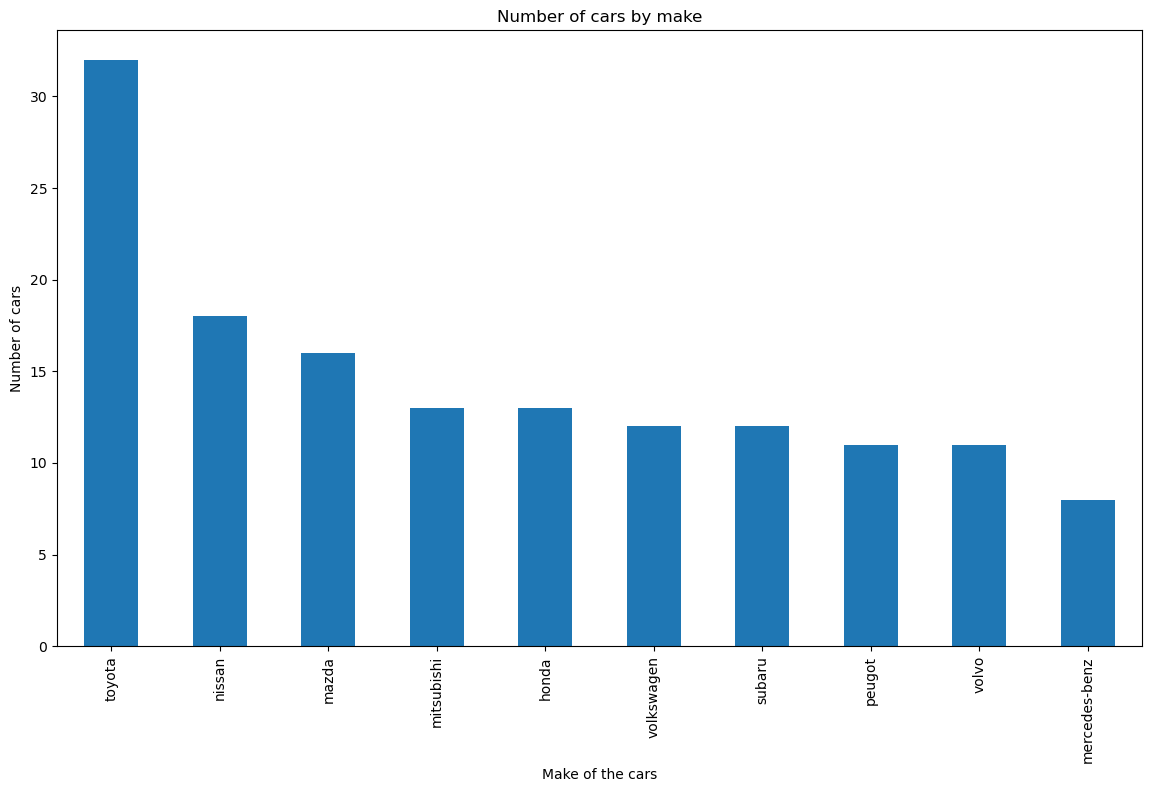

In [35]:
df.make.value_counts().nlargest(10).plot(kind='bar', figsize =(14,8))
plt.title("Number of cars by make")
plt.ylabel("Number of cars")
plt.xlabel("Make of the cars");

##### **drive_wheels 명목형 변수**

In [36]:
drive_wheels_count = df['drive-wheels'].value_counts()
print(drive_wheels_count)

fwd    118
rwd     76
4wd      9
Name: drive-wheels, dtype: int64


---
> ### **산포 계산**
---

##### **표준편차 계산**

In [37]:
#std() function
std_dev = df.std()
print(std_dev)
# 특정 열의 표준편차 계산
sv_height = df.loc[:,'height'].std()
print(sv_height)

symboling               1.250021
normalized-losses      31.784599
wheel-base              6.040994
length                 12.339090
width                   2.150274
height                  2.442526
curb-weight           522.557049
engine-size            41.797123
bore                    0.274054
stroke                  0.318023
compression-ratio       3.888216
horsepower             39.612384
peak-rpm              479.820136
city-mpg                6.529812
highway-mpg             6.874645
price                7898.957924
dtype: float64
2.4425257040318664


C:\Users\skyme\AppData\Local\Temp\ipykernel_20988\3000797036.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_dev = df.std()


##### **분산 계산**

In [38]:
#var() function
variance = df.var()
print(variance)
# 특정 열의 분산 계산
var_height = df.loc[:,'height'].var()
print(var_height)

symboling            1.562552e+00
normalized-losses    1.010261e+03
wheel-base           3.649361e+01
length               1.522531e+02
width                4.623677e+00
height               5.965932e+00
curb-weight          2.730659e+05
engine-size          1.746999e+03
bore                 7.510565e-02
stroke               1.011384e-01
compression-ratio    1.511822e+01
horsepower           1.569141e+03
peak-rpm             2.302274e+05
city-mpg             4.263844e+01
highway-mpg          4.726074e+01
price                6.239354e+07
dtype: float64
5.965931814856364


C:\Users\skyme\AppData\Local\Temp\ipykernel_20988\2915447891.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var()


In [39]:
df.loc[:,'height'].var()

5.965931814856364

In [40]:
df['height'].var()

5.965931814856364

---
> ### **왜도 계산**
---

In [41]:
df.skew()

C:\Users\skyme\AppData\Local\Temp\ipykernel_20988\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


symboling            0.204275
normalized-losses    0.864408
wheel-base           1.041170
length               0.154086
width                0.900685
height               0.064134
curb-weight          0.668942
engine-size          1.934993
bore                 0.013419
stroke              -0.669515
compression-ratio    2.682640
horsepower           1.391224
peak-rpm             0.073094
city-mpg             0.673533
highway-mpg          0.549104
price                1.812335
dtype: float64

In [42]:
df.loc[:,'height'].skew()

0.06413448813322854

---
> ### **첨도 계산**
---

In [43]:
kurtosis = df.kurt()
print(kurtosis)

sk_height = df['height'].kurt()
print(sk_height)

symboling           -0.691709
normalized-losses    1.403077
wheel-base           0.986065
length              -0.075680
width                0.687375
height              -0.429298
curb-weight         -0.069648
engine-size          5.233661
bore                -0.830965
stroke               2.030592
compression-ratio    5.643878
horsepower           2.646625
peak-rpm             0.068155
city-mpg             0.624470
highway-mpg          0.479323
price                3.287412
dtype: float64
-0.4292976016374439


C:\Users\skyme\AppData\Local\Temp\ipykernel_20988\6738269.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurt()


---
> ### **산점도 그리기**
---

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (10,6)

##### **engine-size, price의 산점도**

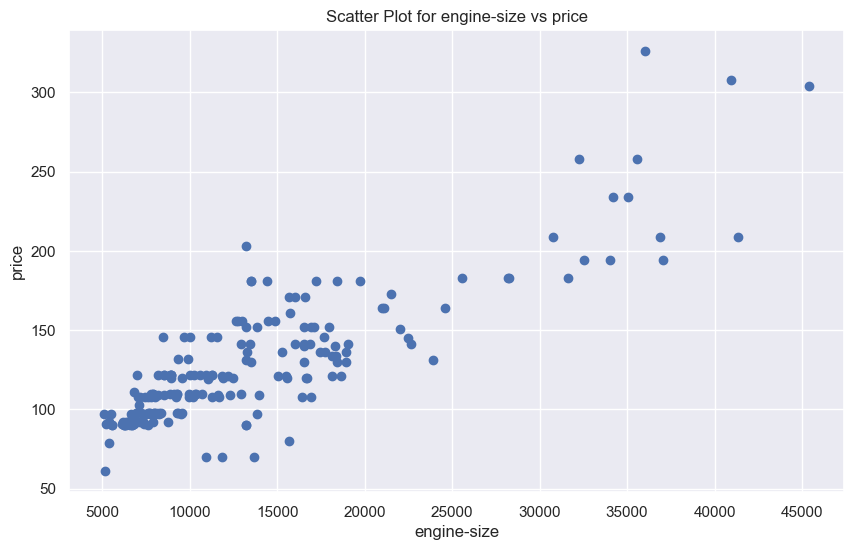

In [45]:
plt.scatter(df['price'],df['engine-size'])
plt.title("Scatter Plot for engine-size vs price")
plt.xlabel("engine-size")
plt.ylabel('price');

---
> ### **박스플롯 그리기**
---

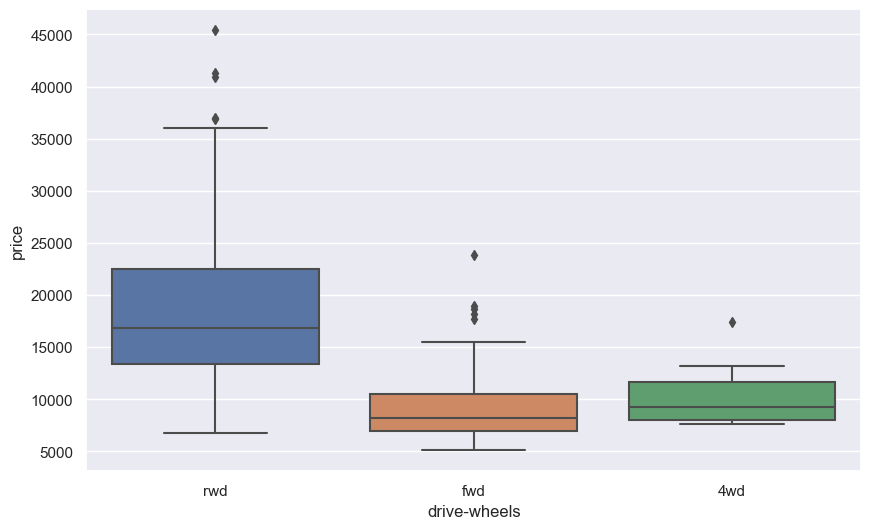

In [46]:
sns.boxplot(x='drive-wheels',y='price',data=df);

---
> ### **Percentiles(백분위수) 계산하기**
---

In [47]:
height = df['height']
percentile = np.percentile(height,50)
print(percentile)

54.1


---
> ### **IQR(Inter Quartile Range, 사분위수) 계산하기**
---

In [48]:
price = df.price.sort_values()
Q1 = np.percentile(price,25)
Q2 = np.percentile(price,50)
Q3 = np.percentile(price,75)
IQR = Q3-Q1
IQR

8718.5

In [49]:
min = df.price.quantile(0)
Q1 = df.price.quantile(0.25)
Q2 = df.price.quantile(0.5)
Q3 = df.price.quantile(0.75)
max = df.price.quantile(1)
print(min, Q1,Q2,Q3,max)
print(Q3-Q1)

5118.0 7781.5 10595.0 16500.0 45400.0
8718.5


---
> ### **박스플롯 그려보기**
---

In [50]:
scorePhysics = [34,35,35,35,35,35,36,36,37,37,37,37,37,38,38,38,39,39,
   40,40,40,40,40,41,42,42,42,42,42,42,42,42,43,43,43,43,44,44,44,44,44,44,45,
   45,45,45,45,46,46,46,46,46,46,47,47,47,47,47,47,48,48,48,48,48,49,49,49,49,
   49,49,49,49,52,52,52,53,53,53,53,53,53,53,53,54,54,
   54,54,54,54,54,55,55,55,55,55,56,56,56,56,56,56,57,57,57,58,58,59,59,59,59,
   59,59,59,60,60,60,60,60,60,60,61,61,61,61,61,62,62,63,63,63,63,63,64,64,64,
   64,64,64,64,65,65,65,66,66,67,67,68,68,68,68,68,68,68,69,70,71,71,71,72,72,
   72,72,73,73,74,75,76,76,76,76,77,77,78,79,79,80,80,81,84,84,85,85,87,87,88]
scoreLiterature = [49,49,50,51,51,52,52,52,52,53,54,54,55,55,55,55,56,
   56,56,56,56,57,57,57,58,58,58,59,59,59,60,60,60,60,60,60,60,61,61,61,62,
   62,62,62,63,63,67,67,68,68,68,68,68,68,69,69,69,69,69,69,
   70,71,71,71,71,72,72,72,72,73,73,73,73,74,74,74,74,74,75,75,75,76,76,76,
   77,77,78,78,78,79,79,79,80,80,82,83,85,88]
scoreComputer = [56,57,58,58,58,60,60,61,61,61,61,61,61,62,62,62,62,
   63,63,63,63,63,64,64,64,64,65,65,66,66,67,67,67,67,67,67,67,68,68,68,69,
   69,70,70,70,71,71,71,73,73,74,75,75,76,76,77,77,77,78,78,81,82,
   84,89,90]
scores=[scorePhysics, scoreLiterature, scoreComputer]

{'whiskers': [<matplotlib.lines.Line2D at 0x2a4efd39430>,
 'caps': [<matplotlib.lines.Line2D at 0x2a4efd39970>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a4efd39190>],
 'medians': [<matplotlib.lines.Line2D at 0x2a4efd39eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a4efd45430>],
 'means': [<matplotlib.lines.Line2D at 0x2a4efd45190>]}

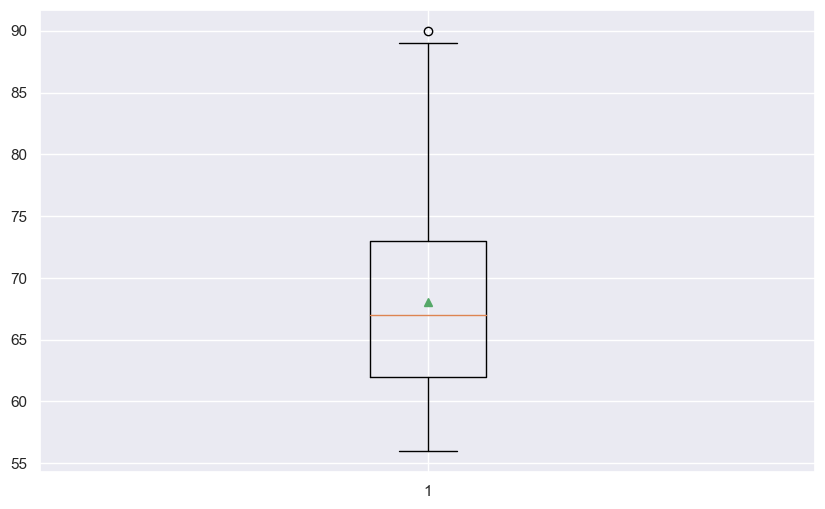

In [51]:
plt.boxplot(scoreComputer, showmeans = True, whis = 1.5)

[None]

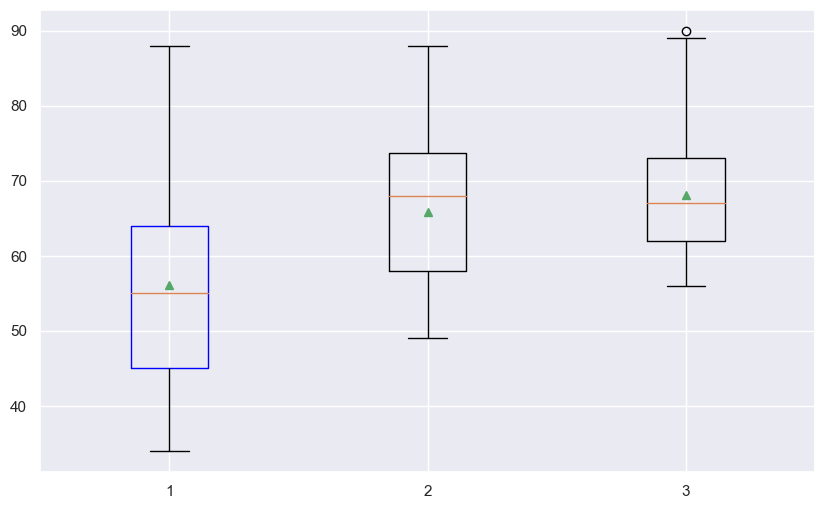

In [52]:
box = plt.boxplot(scores, showmeans =True, whis=1.5)
plt.setp(box['boxes'][0], color ='blue')
plt.setp(box['boxes'][0], color ='blue')